In [27]:
from celldancer import utilities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import anndata as ad
import scvelo as scv
import scanpy as sc

# Circle

In [2]:
circle_gene=cdsim.simulate(kinetic_type='mono',
                    alpha1=1,
                    alpha2=0,
                    beta1=1,
                    beta2=1,
                    gamma1=1,
                    gamma2=1,
                    path1_pct=99,
                    path2_pct=99,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

/home/tung/anaconda3/envs/celldancer/lib/python3.7/site-packages/celldancer/simulation.py:205: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  'gammas': gammas.to_numpy() }


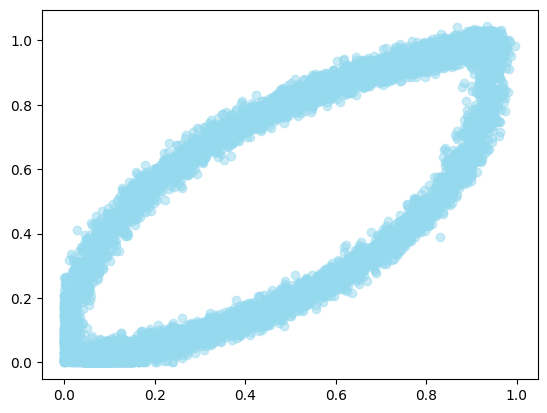

In [3]:
plt.scatter(circle_gene.splice,circle_gene.unsplice,c='#95D9EF',alpha=0.5)

# Transcriptional boosting

In [4]:
tb_gene=cdsim.simulate(kinetic_type='tran_boost',
                    alpha1=0.2,
                    alpha2=0.7,
                    beta1=0.6,
                    beta2=0.3,
                    gamma1=0.4,
                    gamma2=0.3,
                    path1_pct=99,
                    path2_pct=30,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

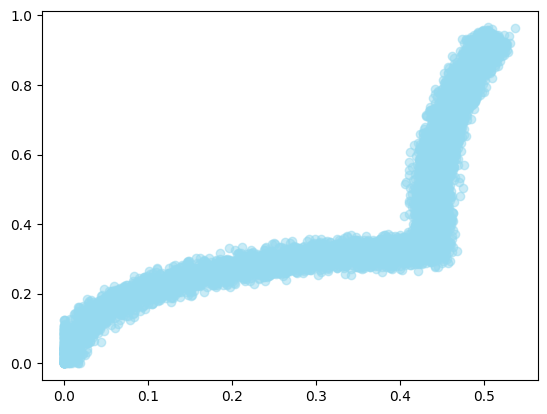

In [5]:
plt.scatter(tb_gene.splice,tb_gene.unsplice,c='#95D9EF',alpha=0.5)

# Multiple induction

In [6]:
mi_gene=cdsim.simulate(kinetic_type='multi_forward',
                    alpha1=0.45,
                    alpha2=0.75,
                    beta1=0.6,
                    beta2=0.4,
                    gamma1=0.35,
                    gamma2=0.85,
                    path1_pct=99,
                    path2_pct=99,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

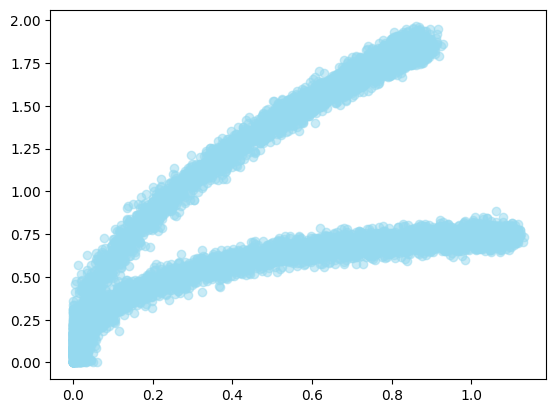

In [7]:
plt.scatter(mi_gene.splice,mi_gene.unsplice,c='#95D9EF',alpha=0.5)

# Multiple repression

In [8]:
mr_gene=cdsim.simulate(kinetic_type='multi_backward',
                    beta1=1,
                    beta2=1,
                    gamma1=1,
                    gamma2=1,
                    start_splice1=1,
                    start_splice2=1,
                    start_unsplice1=1,
                    start_unsplice2=0.2,
                    path1_cell_number=5000,
                    path2_cell_number=5000)

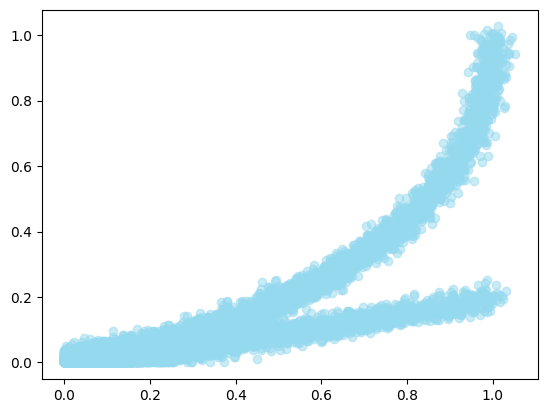

In [9]:
plt.scatter(mr_gene.splice,mr_gene.unsplice,c='#95D9EF',alpha=0.5)

In [19]:
mr_gene

,unsplice,splice,u1,s1,alpha,beta,gamma,embedding1,embedding2,cellID,clusters
0,0.978520,1.017085,0.999000,1.000000,0,1,1,0.978520,1.017085,0,None
1,0.999981,0.954819,0.998079,0.999999,0,1,1,0.999981,0.954819,1,None
2,0.990557,1.009341,0.997159,0.999996,0,1,1,0.990557,1.009341,2,None
3,0.984857,1.012915,0.996240,0.999993,0,1,1,0.984857,1.012915,3,None
4,0.971226,0.998003,0.995322,0.999990,0,1,1,0.971226,0.998003,4,None
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.042376,0.002009,0.019240,0,1,1,0.000000,0.042376,9995,None
9996,0.000000,0.012981,0.002007,0.019224,0,1,1,0.000000,0.012981,9996,None
9997,0.007621,0.013754,0.002005,0.019208,0,1,1,0.007621,0.013754,9997,None
9998,0.022852,0.023786,0.002003,0.019192,0,1,1,0.022852,0.023786,9998,None


# Merge

In [28]:
circle_u = np.array(circle_gene["unsplice"])
circle_s = np.array(circle_gene["splice"])
tb_u = np.array(tb_gene["unsplice"])
tb_s = np.array(tb_gene["splice"])
mi_u = np.array(mi_gene["unsplice"])
mi_s = np.array(mi_gene["splice"])
mr_u = np.array(mr_gene["unsplice"])
mr_s = np.array(mr_gene["splice"])

In [29]:
u = np.vstack([circle_u, tb_u, mi_u, mr_u])
s = np.vstack([circle_s, tb_s, mi_s, mr_s])

In [30]:
clusters = ["1" for i in range(0, 2500)] + ["2" for i in range(0, 2500)] + ["3" for i in range(0, 2500)] + ["4" for i in range(0, 2500)]

In [31]:
pseudotime = np.float64(np.linspace(0, 1, 10000)).tolist()

In [32]:
embedding = np.random.rand(10000, 2)

In [33]:
celltype = ["A" for i in range(0, 5000)] + ["B" for i in range(0, 5000)]

In [48]:
cell_index = [str(i) for i in range(0, 10000)]

In [49]:
gene_number = [f"gene_{i}" for i in range(1, 5)]

In [65]:
adata = ad.AnnData(np.float32(u).T)

In [66]:
adata.obs_names = cell_index
adata.var_names = gene_number
adata.obs["dpt_pseudotime"] = pseudotime
adata.obs["celltype"] = celltype
adata.obs["leiden"] = clusters 
adata.obsm["X_umap"] = embedding
adata.layers["Mu"] = np.float32(u).T
adata.layers["Ms"] = np.float32(s).T
adata.uns["iroot"] = "1"

# Export

In [67]:
adata.write_h5ad("data/simulated.h5ad")